In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2
%matplotlib inline

In [10]:
# Loading all the models
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
# pickle files
mean = pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('./model/model_svm.pickle','rb'))
model_pca = pickle.load(open('./model/pca_50.pickle','rb'))

print('Model loaded sucessfully')

Model loaded sucessfully


In [13]:
gender_pre = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [19]:
def pipeline_model(img,color='rgb'):
    #step 2: convert into grayscale
    if color == 'bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # step-3: crop the face (using haar cascade classifier)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) #drawing rectangle
        roi = gray[y:y+h,x:x+w] #crop image
        # step 4: normalization
        roi = roi / 255.0
        # step-5: resize image (100,100)
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)

        # step-6: flattening (1x10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1

        # step-7: subtract with mean
        roi_mean = roi_reshape - mean

        # step-8: get eigen image
        eigen_image = model_pca.transform(roi_mean)

        # step-9: pass to ml model (svm)
        results = model_svm.predict_proba(eigen_image)[0]

        # step-10:
        predict = results.argmax() # 0 or 1
        score = results[predict]

        # step-11:
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img
        

In [21]:
from PIL import Image

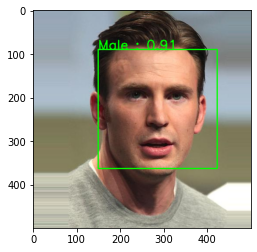

In [28]:
# test data 
test_data_path = './data/male_000281.jpg'
color = 'bgr'
# step-1: read Image
img = Image.open(test_data_path) #rgb
# step-2: convert into array
img = np.array(img)
# step-3: pass into pipeline model
img = pipeline_model(img)
plt.imshow(img)

In [24]:
# Apply pipeline model to video

In [27]:
cap = cv2.VideoCapture('./data/video.mp4')

while True:
    ret, frame = cap.read()  #bgr
    
    if ret == False:
        break
    
    frame = pipeline_model(frame,color='bgr')
    
    cv2.imshow('Gender Detection',frame)
    if cv2.waitKey(10) == ord('s'): # press s to exit # esc Key (27)
        break

cv2.destroyAllWindows()
cap.release()

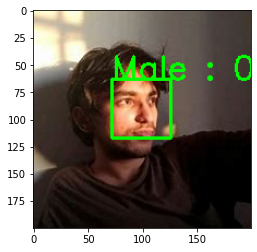

In [30]:
# test data 
test_data_path = './data/sb.jpg'
color = 'bgr'
# step-1: read Image
img = Image.open(test_data_path) #rgb
# step-2: convert into array
img = np.array(img)
# step-3: pass into pipeline model
img = pipeline_model(img)
plt.imshow(img)

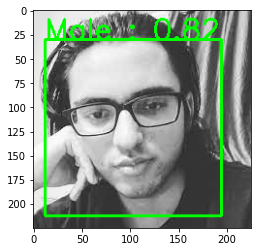

In [31]:
# test data 
test_data_path = './data/sb2.jpg'
color = 'bgr'
# step-1: read Image
img = Image.open(test_data_path) #rgb
# step-2: convert into array
img = np.array(img)
# step-3: pass into pipeline model
img = pipeline_model(img)
plt.imshow(img)